In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасета

In [2]:
t1 = pd.read_csv("clicks_dataset_msk.csv", names=['request', 'answer', 'true_false'])
t1.head()

,request,answer,true_false
0,1590973,168299,1
1,1590973,718560,0
2,1234953,325828,1
3,1234953,135968,0
4,3326557,334526,1


In [3]:
#функция для отображения результатов
def vizualize(tab, x,y):
    tab.plot(x=x, y=y, kind='scatter')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(y + " ("+ x + ")" )
    plt.show()

In [19]:
#Разделяем на корректные и некорректные выборки
t_correct = t1[t1.true_false == 1]
t_incorrect = t1[t1.true_false == 0]

# Анализ пар запрос-ответ

In [22]:
req_ans = t1.groupby(['request', 'answer', 'true_false']).size().unstack(fill_value=0)
req_ans = req_ans.rename(columns = {0:"zeros", 1:"unos"})
req_ans[(req_ans["zeros"] > 0) & (req_ans["unos"]>0)]

,true_false,zeros,unos
request,answer,,
203168,564481,1,1
375422,559107,1,1
413553,508120,1,1
485280,103381,1,1
487181,798637,1,1
...,...,...,...
4372226,802680,1,1
4381632,80539,1,1
4386727,88454,1,1


# Анализ частот запросов

In [23]:
#Общая статистика
print("Общее количество запросов = ", len(t_correct["request"]))
print("Количество уникальных запросов =", len(t_correct["request"].unique()))
print("Доля уникальных запросов =" , round(len(t_correct["request"].unique()) / len(t_correct["request"]), 2))

Общее количество запросов =  6489941
Количество уникальных запросов = 4520364
Доля уникальных запросов = 0.7


In [45]:
reqs = t_correct.groupby("request").size().reset_index(name="freqs")
reqs = reqs.groupby("freqs").size().reset_index(name="distr_freqs")
reqs["percent"] = round(100*reqs["distr_freqs"] / reqs["distr_freqs"].sum(), 2)
reqs.sort_values(by = ["distr_freqs", "freqs"], ascending=[False, True])

,freqs,distr_freqs,percent
0,1,4197429,92.86
1,2,195826,4.33
2,3,50721,1.12
3,4,22130,0.49
4,5,12329,0.27
...,...,...,...
797,9842,1,0.00
798,10932,1,0.00
799,11281,1,0.00
800,14297,1,0.00


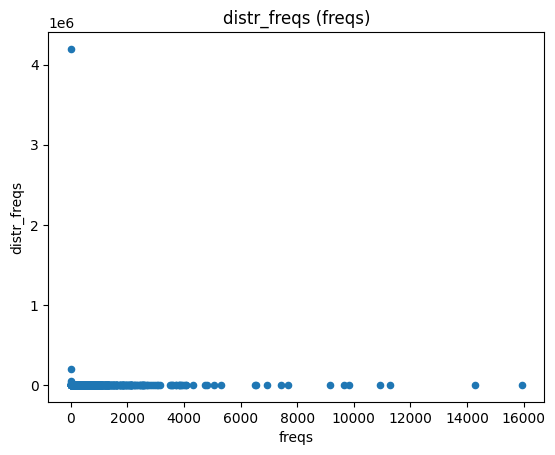

In [49]:
vizualize(reqs, "freqs", "distr_freqs")

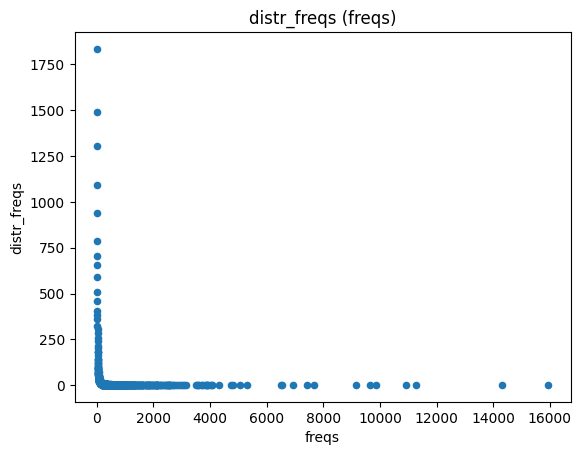

In [52]:
#рассмотрим без самых частотных элементов
vizualize(reqs[10:], "freqs", "distr_freqs")

In [53]:
#Побьем запросы по бакетам ио 1000-м для лучшей визуализации 
# (1 бакет : 1-1000 повторений, 2 бакет : 1001-2000 повторений и тд)
def bucket_number(freqs):
    return (freqs - 1) // 1000 + 1
    
reqs['bucket'] = reqs['freqs'].apply(bucket_number)
sums_by_bucket = reqs.groupby('bucket')['distr_freqs'].sum().reset_index(name="count")
sums_by_bucket["percent"] = round(100*sums_by_bucket["count"] / sums_by_bucket["count"].sum(), 6)
sums_by_bucket

,bucket,count,percent
0,1,4520179,99.995907
1,2,114,0.002522
2,3,37,0.000819
3,4,15,0.000332
4,5,5,0.000111
5,6,2,0.000044
6,7,3,0.000066
7,8,2,0.000044
8,10,3,0.000066
9,11,1,0.000022


In [ ]:
#вывод 2

Видим, что запросов, которые ни разу не повтоялись : примерно 93 процента 
То есть для большинства запросов у нас существует только 1 пара корректных и некорректных ответов
запросов, которые повторются более 1 раза : всего 7 процентов, но при этом присутствуют запросы, 
которые повторялись огромное количество раз (вплоть до ~16000)

# Анализ пар запрос-ответ по корректным и некорректным сэмплам

In [54]:
correct_pairs = t_correct.groupby(["request", "answer"]).size().reset_index(name="count_pairs")
correct_pairs.groupby("count_pairs").size().reset_index(name="count")

,count_pairs,count
0,1,6489941


In [55]:
incorrect_pairs = t_incorrect.groupby(["request", "answer"]).size().reset_index(name="count_pairs")
incorrect_pairs = incorrect_pairs.groupby("count_pairs").size().reset_index(name="count")
incorrect_pairs["percent"] = round(100*incorrect_pairs["count"] / incorrect_pairs["count"].sum(), 2)
incorrect_pairs

,count_pairs,count,percent
0,1,6484783,99.96
1,2,2561,0.04
2,3,12,0.00


# Анализ корректного sample

In [28]:
print("Общее количество корректных ответов = ", len(t_correct["answer"]))
print("Количество уникальных корректных ответов =", len(t_correct["answer"].unique()))
print("Доля уникальных корректных ответов =", round(len(t_correct["answer"].unique())/ len(t_correct["answer"]), 2))

Общее количество корректных ответов =  6489941
Количество уникальных корректных ответов = 1005313
Доля уникальных корректных ответов = 0.15


In [57]:
correct_counts = t_correct.groupby('answer').size().reset_index(name='counts')
correct_counts_res = correct_counts.groupby('counts').size().reset_index(name='correct_counts')
correct_counts_res["percent"] = round(100*correct_counts_res["correct_counts"] / correct_counts_res["correct_counts"].sum(), 4)
correct_counts_res

,counts,correct_counts,percent
0,1,465022,46.2564
1,2,141199,14.0453
2,3,75663,7.5263
3,4,49922,4.9658
4,5,36404,3.6212
...,...,...,...
655,1926,1,0.0001
656,1947,1,0.0001
657,1994,1,0.0001
658,2698,1,0.0001


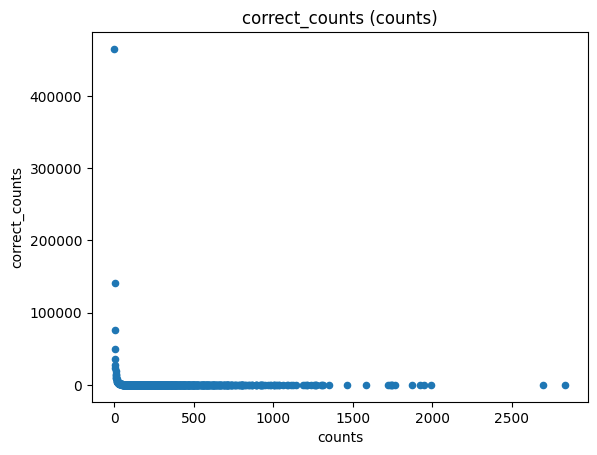

In [58]:
vizualize(correct_counts_res, "counts", "correct_counts")

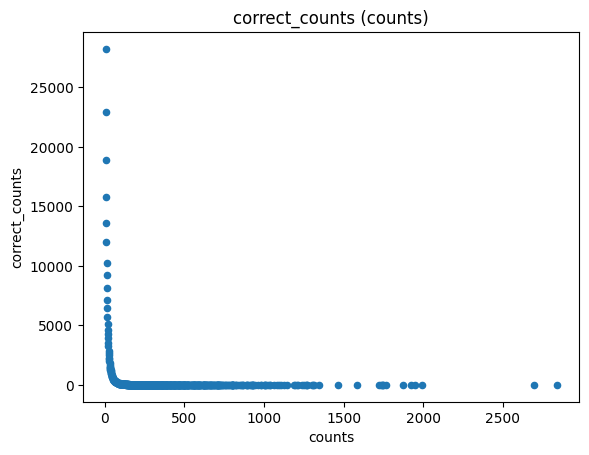

In [59]:
#уберем наиболее частотные значения
vizualize(correct_counts_res[5:], "counts", "correct_counts")

# Анализ некорректного sample

In [60]:
print("Общее количество некорректных ответов = ", len(t_incorrect["answer"]))
print("Количество уникальных некорректных ответов =", len(t_incorrect["answer"].unique()))
print("Доля уникальных некорректных ответов =", round(len(t_incorrect["answer"].unique())/ len(t_incorrect["answer"]), 2))

Общее количество некорректных ответов =  6489941
Количество уникальных некорректных ответов = 460016
Доля уникальных некорректных ответов = 0.07


In [61]:
#рассмотрим распределение частот возникновения ответов в некорректном sample
incorrect_counts = t_incorrect.groupby('answer').size().reset_index(name='counts')
incorrect_counts_res = incorrect_counts.groupby('counts').size().reset_index(name='incorrect_counts')
incorrect_counts_res["percent"] = round(100*incorrect_counts_res["incorrect_counts"] / incorrect_counts_res["incorrect_counts"].sum(), 4)
incorrect_counts_res.head(10)

,counts,incorrect_counts,percent
0,1,10,0.0022
1,2,43,0.0093
2,3,167,0.0363
3,4,636,0.1383
4,5,1747,0.3798
5,6,4034,0.8769
6,7,8105,1.7619
7,8,13761,2.9914
8,9,21502,4.6742
9,10,29914,6.5028


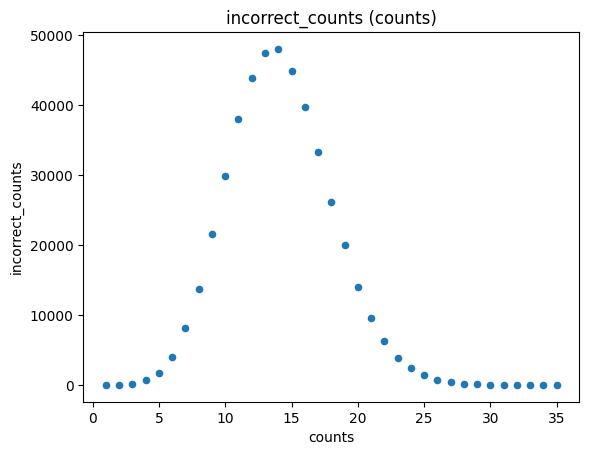

In [62]:
vizualize(incorrect_counts_res, "counts", "incorrect_counts")

In [ ]:
Вывод 3 : распределения частот ответов - разные для корректного и некоррекного подмножеств
Мы видим, что большинство ответов для корректного множества - возникают всего 1 раз, 
в то время как большинство ответов для некорректного подмножества возникают ~15 раз, 
при этом максимальное значение возникновения 1 и того же answer в correct sample > 2500, а в некорректном = 35

# Анализ распределения ответов в обоих sample-ах

In [37]:
counts_obj = t1.groupby(['answer', 'true_false']).size().unstack(fill_value=0)
counts_obj = counts_obj.rename(columns = {0:"zeros", 1:"unos"})
counts_obj2=counts_obj.groupby(["zeros", "unos"]).size().reset_index(name="count_p")
counts_obj2=counts_obj2.sort_values(by=["zeros", "unos"], ascending=[True, True])
counts_obj2

,zeros,unos,count_p
0,0,1,384337
1,0,2,94384
2,0,3,44873
3,0,4,27608
4,0,5,19433
...,...,...,...
4472,33,2,1
4473,33,3,1
4474,33,7,1
4475,34,4,2


In [63]:
zeros_0 = counts_obj2[counts_obj2["zeros"] == 0]["count_p"].sum()
unos_0 = counts_obj2[counts_obj2["unos"] == 0]["count_p"].sum()
all_s = counts_obj2["count_p"].sum()
print("Общее количетво ответов =", all_s)
perc_z = round(100*zeros_0 / all_s, 2)
perc_u = round(100*unos_0 / all_s, 2)
print("Процент ответов, которые попали только в correct sample =", perc_z)
print("Процент ответов, которые попали только в incorrect sample =", perc_u)
print("Процент ответов, которые представляют оба sample =", round(100 - perc_z - perc_u, 2))

Общее количетво ответов = 1154540
Процент ответов, которые попали только в correct sample = 60.16
Процент ответов, которые попали только в incorrect sample = 12.93
Процент ответов, которые представляют оба sample = 26.91


In [ ]:
вывод 4 : большинство ответов присутствует только в классе 1, для них нет примеров их присутствия в негативном sample

In [ ]:
Итоговый вывод :
1)Метод, по которому каждому запросу ставился в соответствие нерелевантный answer - вызывает сомнения.
 В датасете присутствуют пары запрос-ответ, которые попадают, как в positive sample, так и в negative sample
2)В correct sample не существует идентичных пар request-answer (скорее всего были убраны при помощи drop_duplicates),
с учетом 1-го, любая ошибка приводит к ситуации, когда для релевантного ответа существует такая же пара запрос-ответ
в incorrect sample
3)Распределение answer по correct и incorrect sample - разное, большинство answer присутствует только в 
correct_sample, пересечение достигается лишь по ~27 процентам answer, при этом и распределение частот так же разное
4)Присутствует дисбаланс по requests - большинство запросов встречаются всего 1 раз, но при этом присутствуют 
запросы, которые встречаются очень большое количество раз - для них обучающая выборка является сильно
более представительной, чем для request-ов, которые встречаются малое кол-во раз, что может привести к 
искаженным значениям метрик на валидации

Все эти выводы показывают, что обучающая выборка - не совсем корректна и требует более детальной и 
тщательной проработки, включая балансировку, более аккуратный метод формирования negative sample и насыщением
positive sample. 



